In [195]:
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from __future__ import division

from pandas_datareader import data as pdr
from datetime import datetime
import yfinance as yf

In [196]:
import requests

from io import StringIO

In [197]:
poll_df = pd.read_csv(r'C:\Users\Operator\OneDrive\Pulpit\kurs\2012-general-election-romney-vs-obama.csv')
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


In [198]:
poll_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Pollster                590 non-null    object 
 1   Start Date              590 non-null    object 
 2   End Date                590 non-null    object 
 3   Entry Date/Time (ET)    590 non-null    object 
 4   Number of Observations  568 non-null    float64
 5   Population              590 non-null    object 
 6   Mode                    590 non-null    object 
 7   Obama                   590 non-null    float64
 8   Romney                  590 non-null    float64
 9   Undecided               423 non-null    float64
 10  Other                   202 non-null    float64
 11  Pollster URL            590 non-null    object 
 12  Source URL              588 non-null    object 
 13  Partisan                590 non-null    object 
 14  Affiliation             590 non-null    ob

Text(0, 0.5, 'Count')

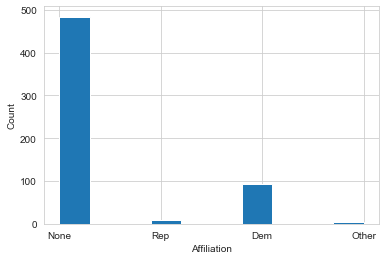

In [199]:
plt.hist(x = 'Affiliation', data=poll_df)
plt.xlabel('Affiliation')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

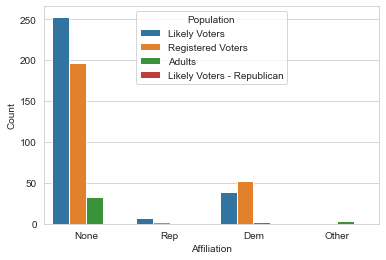

In [200]:
sns.countplot(x = 'Affiliation', data=poll_df, hue='Population')
plt.xlabel('Affiliation')
plt.ylabel('Count')

In [201]:
avg = pd.DataFrame(poll_df.mean())
avg.head()

<ipython-input-201-a7a64696cc03>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  avg = pd.DataFrame(poll_df.mean())


,0
Number of Observations,1295.390845
Obama,46.774576
Romney,44.572881
Undecided,6.546099
Other,3.400990


In [202]:
avg.drop(['Number of Observations', 'Question Iteration', 'Question Text'], axis=0, inplace=True)

In [203]:
avg.head()

,0
Obama,46.774576
Romney,44.572881
Undecided,6.546099
Other,3.400990


In [204]:
std = pd.DataFrame(poll_df.std())
std.drop('Number of Observations', axis=0, inplace=True)

<ipython-input-204-5e0a61a036f0>:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  std = pd.DataFrame(poll_df.std())


In [205]:
std.head()

,0
Obama,2.447069
Romney,2.925320
Undecided,3.698614
Other,2.721318
Question Text,NaN


<AxesSubplot:>

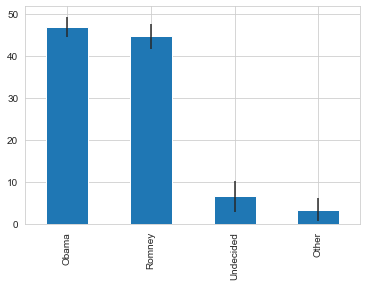

In [206]:
avg.plot(yerr=std,kind='bar', legend=False)

In [207]:
poll_avg = pd.concat([avg,std],axis=1)
poll_avg = poll_avg.dropna()
poll_avg

,0,0
Obama,46.774576,2.447069
Romney,44.572881,2.925320
Undecided,6.546099,3.698614
Other,3.400990,2.721318


In [208]:
poll_avg.columns = ['Averange', 'STD']
poll_avg

,Averange,STD
Obama,46.774576,2.447069
Romney,44.572881,2.925320
Undecided,6.546099,3.698614
Other,3.400990,2.721318


<AxesSubplot:xlabel='End Date'>

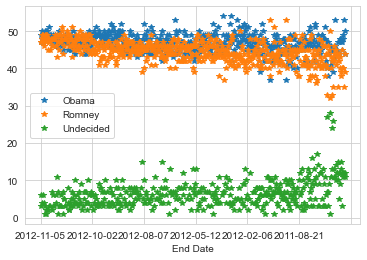

In [209]:
poll_df.plot(x='End Date', y=['Obama','Romney','Undecided'], linestyle='',marker='*')

In [210]:
poll_df['Difference'] = (poll_df.Obama - poll_df.Romney)/100
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration,Difference
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1,0.00
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1,0.02
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1,0.00
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1,0.01
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1,-0.01


In [211]:
poll_df = poll_df.groupby(['Start Date'], as_index = False).mean()
poll_df.drop(['Other', 'Question Iteration', 'Question Text'], axis=1, inplace=True)
poll_df.head()

<ipython-input-211-eb4e571fd7cd>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  poll_df = poll_df.groupby(['Start Date'], as_index = False).mean()


,Start Date,Number of Observations,Obama,Romney,Undecided,Difference
0,2009-03-13,1403.0,44.0,44.0,12.0,0.00
1,2009-04-17,686.0,50.0,39.0,11.0,0.11
2,2009-05-14,1000.0,53.0,35.0,12.0,0.18
3,2009-06-12,638.0,48.0,40.0,12.0,0.08
4,2009-07-15,577.0,49.0,40.0,11.0,0.09


<AxesSubplot:xlabel='Start Date'>

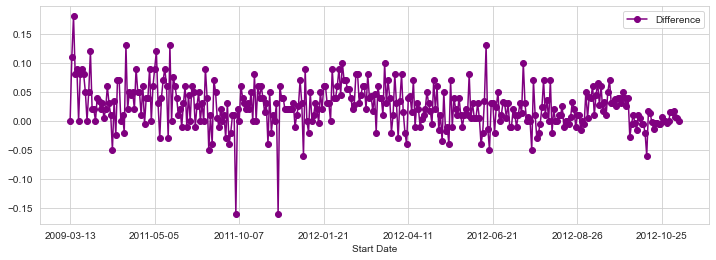

In [212]:
poll_df.plot('Start Date', 'Difference', figsize=(12,4), marker = 'o', linestyle='-', color ='purple')

In [215]:
row_in = 0
xlimit = []

for date in poll_df['Start Date']:
    if date[0:7] == '2012-10':
        xlimit.append(row_in)
        row_in += 1
        
    else:
        row_in += 1
print(min(xlimit))
print(max(xlimit))

329
356


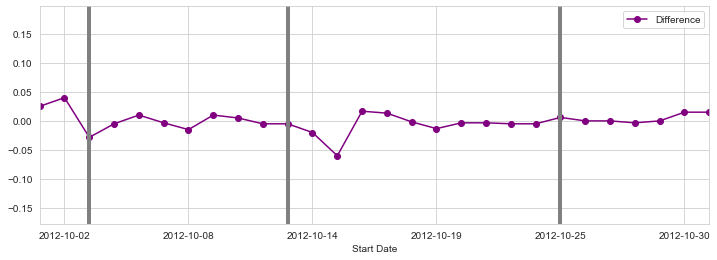

In [217]:
poll_df.plot('Start Date', 'Difference', figsize=(12,4), marker = 'o', linestyle='-', color ='purple', xlim=(329,356))

#oct 3rd
plt.axvline(x=329+2, linewidth=4, color='grey')
#oct 11th
plt.axvline(x=329+10, linewidth=4, color='grey')
#oct 22nd
plt.axvline(x=329+21, linewidth=4, color='grey')

In [219]:
donor = pd.read_csv(r'C:\Users\Operator\OneDrive\Pulpit\kurs\Election_Donor_Data.csv')
donor.head()

<ipython-input-219-171690fc963a>:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  donor = pd.read_csv(r'C:\Users\Operator\OneDrive\Pulpit\kurs\Election_Donor_Data.csv')


,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.0,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.0,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403.0,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253.0,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467.0,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


In [220]:
donor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   cmte_id            1001731 non-null  object 
 1   cand_id            1001731 non-null  object 
 2   cand_nm            1001731 non-null  object 
 3   contbr_nm          1001731 non-null  object 
 4   contbr_city        1001712 non-null  object 
 5   contbr_st          1001727 non-null  object 
 6   contbr_zip         1001620 non-null  object 
 7   contbr_employer    988002 non-null   object 
 8   contbr_occupation  993301 non-null   object 
 9   contb_receipt_amt  1001731 non-null  float64
 10  contb_receipt_dt   1001731 non-null  object 
 11  receipt_desc       14166 non-null    object 
 12  memo_cd            92482 non-null    object 
 13  memo_text          97770 non-null    object 
 14  form_tp            1001731 non-null  object 
 15  file_num           1001731 non-n

In [222]:
donor['contb_receipt_amt'].value_counts()

 100.00     178188
 50.00      137584
 25.00      110345
 250.00      91182
 500.00      57984
             ...  
 386.10          1
-113.40          1
 1385.00         1
 43.98           1
 2408.79         1
Name: contb_receipt_amt, Length: 8079, dtype: int64

In [223]:
don_mean = donor['contb_receipt_amt'].mean()
don_std = donor['contb_receipt_amt'].std()
print('The averange donation was %.2f with a std %.2f' %(don_mean,don_std))

The averange donation was 298.24 with a std 3749.67


In [225]:
top_donor = donor['contb_receipt_amt'].copy()
top_donor.sort_values()
top_donor

0           250.0
1            50.0
2           250.0
3           250.0
4           300.0
            ...  
1001726    5000.0
1001727    2500.0
1001728     500.0
1001729     500.0
1001730    2500.0
Name: contb_receipt_amt, Length: 1001731, dtype: float64

In [226]:
top_donor.value_counts().head(10)

100.0     178188
50.0      137584
25.0      110345
250.0      91182
500.0      57984
2500.0     49005
35.0       37237
1000.0     36494
10.0       33986
200.0      27813
Name: contb_receipt_amt, dtype: int64

<AxesSubplot:>

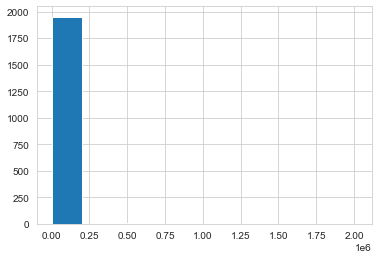

In [237]:
com_don = top_donor[top_donor > 2500]
com_don.hist()


In [238]:
candidates = donor.cand_nm.unique()
candidates

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [240]:
party_map={'Bachmann, Michelle': 'Republican',
           'Romney, Mitt': 'Republican', 
           'Obama, Barack': 'Democrat',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Johnson, Gary Earl' : 'Republican',
           'Paul, Ron': 'Republican',
           'Santorum, Rick': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Perry, Rick': 'Republican',}

In [241]:
donor['Party'] = donor.cand_nm.map(party_map)

In [242]:
donor = donor[donor.contb_receipt_amt>0]
donor.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,Party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.0,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.0,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403.0,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253.0,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467.0,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


In [243]:
donor.groupby('cand_nm')['contb_receipt_amt'].count()

cand_nm
Bachmann, Michelle                 13082
Cain, Herman                       20052
Gingrich, Newt                     46883
Huntsman, Jon                       4066
Johnson, Gary Earl                  1234
McCotter, Thaddeus G                  73
Obama, Barack                     589127
Paul, Ron                         143161
Pawlenty, Timothy                   3844
Perry, Rick                        12709
Roemer, Charles E. 'Buddy' III      5844
Romney, Mitt                      105155
Santorum, Rick                     46245
Name: contb_receipt_amt, dtype: int64

In [244]:
donor.groupby('cand_nm')['contb_receipt_amt'].sum()

cand_nm
Bachmann, Michelle                2.711439e+06
Cain, Herman                      7.101082e+06
Gingrich, Newt                    1.283277e+07
Huntsman, Jon                     3.330373e+06
Johnson, Gary Earl                5.669616e+05
McCotter, Thaddeus G              3.903000e+04
Obama, Barack                     1.358774e+08
Paul, Ron                         2.100962e+07
Pawlenty, Timothy                 6.004819e+06
Perry, Rick                       2.030575e+07
Roemer, Charles E. 'Buddy' III    3.730099e+05
Romney, Mitt                      8.833591e+07
Santorum, Rick                    1.104316e+07
Name: contb_receipt_amt, dtype: float64

In [253]:
cand_amount = donor.groupby('cand_nm')['contb_receipt_amt'].sum()

i = 0

for don in cand_amount:
    print('The candidate %s raise %.0f dollars \n' %(cand_amount.index[i],don))
    i += 1

The candidate Bachmann, Michelle raise 2711439 dollars 

The candidate Cain, Herman raise 7101082 dollars 

The candidate Gingrich, Newt raise 12832770 dollars 

The candidate Huntsman, Jon raise 3330373 dollars 

The candidate Johnson, Gary Earl raise 566962 dollars 

The candidate McCotter, Thaddeus G raise 39030 dollars 

The candidate Obama, Barack raise 135877427 dollars 

The candidate Paul, Ron raise 21009620 dollars 

The candidate Pawlenty, Timothy raise 6004819 dollars 

The candidate Perry, Rick raise 20305754 dollars 

The candidate Roemer, Charles E. 'Buddy' III raise 373010 dollars 

The candidate Romney, Mitt raise 88335908 dollars 

The candidate Santorum, Rick raise 11043159 dollars 



<AxesSubplot:xlabel='cand_nm'>

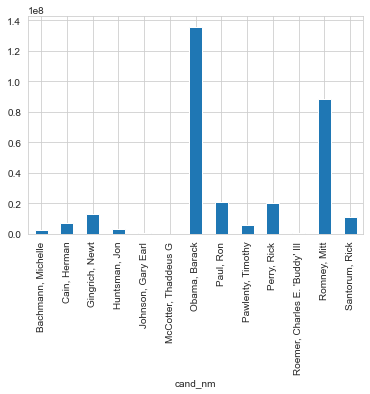

In [254]:
cand_amount.plot(kind='bar')

<AxesSubplot:xlabel='Party'>

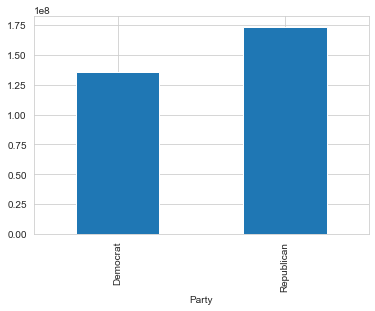

In [255]:
donor.groupby('Party')['contb_receipt_amt'].sum().plot(kind='bar')

In [256]:
occupation = donor.pivot_table('contb_receipt_amt', index = 'contbr_occupation', columns = 'Party', aggfunc = 'sum')

In [257]:
occupation.head()

Party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,NaN
AREA VICE PRESIDENT,250.0,NaN
RESEARCH ASSOCIATE,100.0,NaN
TEACHER,500.0,NaN
THERAPIST,3900.0,NaN


In [258]:
occupation.tail()

Party,Democrat,Republican
contbr_occupation,,
ZOOKEEPER,35.0,NaN
ZOOLOGIST,400.0,NaN
ZOOLOGY EDUCATION,25.0,NaN
\NONE\,NaN,250.0
~,NaN,75.0


In [259]:
occupation.shape

(45067, 2)

In [261]:
occupation = occupation[occupation.sum(1)>1000000]


In [262]:
occupation.shape

(31, 2)

<AxesSubplot:xlabel='contbr_occupation'>

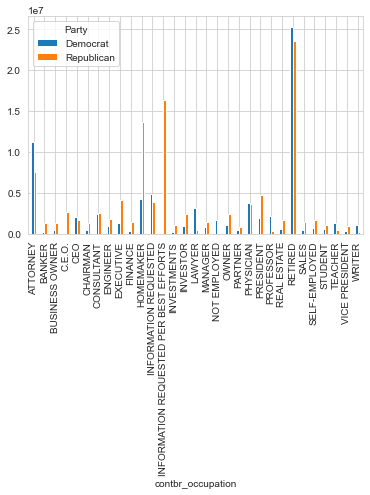

In [263]:
occupation.plot(kind = 'bar')

<AxesSubplot:ylabel='contbr_occupation'>

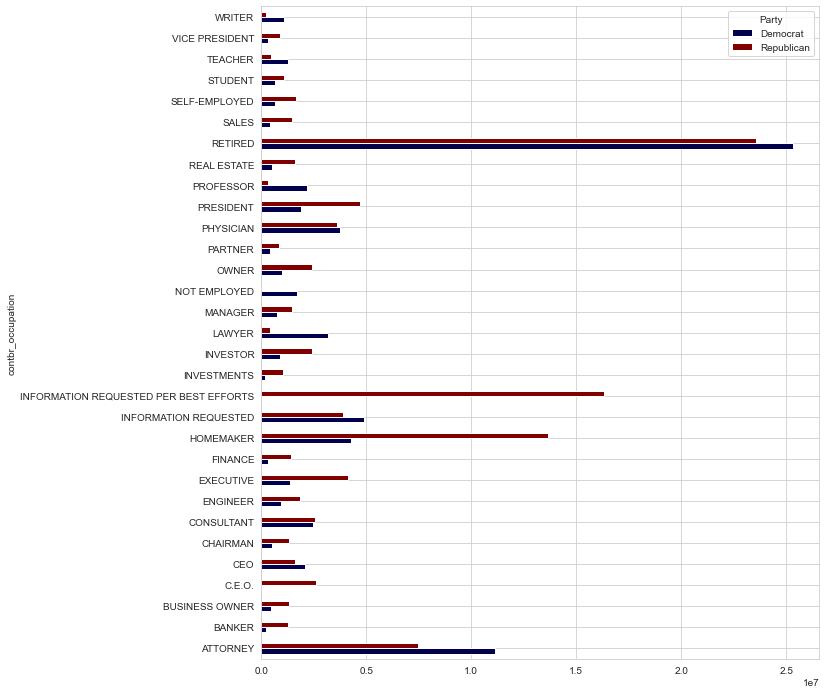

In [265]:
occupation.plot(kind='barh', figsize=(10,12), cmap='seismic')

In [268]:
occupation.drop(['INFORMATION REQUESTED PER BEST EFFORTS', 'INFORMATION REQUESTED'], axis=0, inplace = True)

In [269]:
occupation.loc['CEO'] = occupation.loc['CEO'] + occupation.loc['C.E.O.']
occupation.drop('C.E.O.', inplace = True)

<AxesSubplot:ylabel='contbr_occupation'>

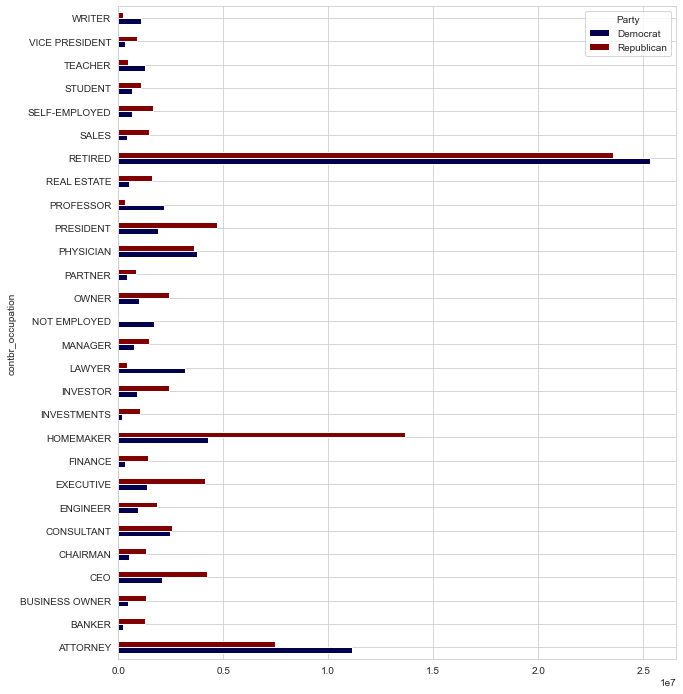

In [270]:
occupation.plot(kind='barh', figsize=(10,12), cmap='seismic')